In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

- Very few null values
- Most columns are non-numeric, including price and odometer
- Column names are non-uniform and messy


In [5]:
autos.columns 

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

Cleaning Column names: 
- Convert camel case to snake case and make all characters lower case
- Shorten unusually long column names like month and year of registration 
- Rename columns to be more descriptive, for e.g. change date_creared to ad_created_date

In [6]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created_date', 'no_of_pics', 'postal_code',
       'last_seen']

In [7]:
autos.head(1) #Viewing column names

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created_date,no_of_pics,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54


#### Convert price and odometer values to float

In [8]:
autos.price[47630:47640] #check price values

47630        $2,000
47631       $12,500
47632        $2,500
47633        $3,900
47634    $3,890,000
47635        $6,666
47636       $13,000
47637        $2,400
47638        $1,450
47639        $2,499
Name: price, dtype: object

In [9]:
# remove commas and dollar sign and then typecast to int
autos.price = autos.price.str.replace(',','').str.replace('$','').astype(int)

In [10]:
autos.price[47630:47640] # check price values again. They have now been converted to integers.

47630       2000
47631      12500
47632       2500
47633       3900
47634    3890000
47635       6666
47636      13000
47637       2400
47638       1450
47639       2499
Name: price, dtype: int32

In [11]:
autos.odometer.head() #check odometer values

0    150,000km
1    150,000km
2     70,000km
3     70,000km
4    150,000km
Name: odometer, dtype: object

In [12]:
# remove commas and 'km' and type cast to int
autos.odometer = autos.odometer.str.replace(',','').str.replace('km','').astype(int)

In [13]:
autos.odometer[10000:10010]

10000     20000
10001    150000
10002    125000
10003     30000
10004    150000
10005    150000
10006     60000
10007    150000
10008    150000
10009    150000
Name: odometer, dtype: int32

In [14]:
autos.rename(columns={'odometer':'odometer_km'},inplace = True) # rename odometer to odometer_km

#### Summary stats

In [15]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created_date,no_of_pics,postal_code,last_seen
count,50000,50000,50000,50000,5.000000e+04,50000,44905,50000.000000,47320,50000.000000,47242,50000.000000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-14 20:50:02,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,9.840044e+03,NaN,NaN,2005.073280,NaN,116.355920,NaN,125732.700000,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,4.811044e+05,NaN,NaN,105.712813,NaN,209.216627,NaN,40042.211706,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Observations:
 -  A few significant categories might be:
  - `brand`
  - `vehicle_type` 
  - `gearbox`
  - `fuel_type`
  - `unrepaired_damage`
  - `model`<br> 
  This is based on the frequency and unique counts and also upon some general knowledge of automobiles.  
 -  `seller` and `offer_type` essentially have only one major category, indicated by `top` and `freq` numbers
 - Need to look more closely at price data to eliminate outliers for analysis
 - Odometer readings don't exceed 150000km.
 - Some of the power readings look unrealistic. Max power can't be 17700.
 - Registration dates. Months is 0 for some. Year is between 1000 and 9999, indicaiting incorrect values. We can ignore these as long as we are not doing a time series analysis. 

In [16]:
# To focus our analysis, creating a list of columns with all important variables. 
imp = ['price','odometer_km','brand','vehicle_type','gearbox','fuel_type','unrepaired_damage','model']

#### Looking at Odometer data

In [17]:
autos.odometer_km.value_counts(dropna = False)

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

More than 60% of the values are for odometer readings of 150000km. This is important to keep in mind for future analysis as other categories are under represented in our data.

#### Changing german to english

In [18]:
autos.unrepaired_damage.value_counts(dropna=False) # Unreparied Damage

nein    35232
NaN      9829
ja       4939
Name: unrepaired_damage, dtype: int64

In [19]:
autos.fuel_type.value_counts(dropna=False) # Fuel Type 

benzin     30107
diesel     14567
NaN         4482
lpg          691
cng           75
hybrid        37
andere        22
elektro       19
Name: fuel_type, dtype: int64

In [20]:
autos.gearbox.value_counts(dropna=False) # Gearbox

manuell      36993
automatik    10327
NaN           2680
Name: gearbox, dtype: int64

We can see that a lot of these have german names which we will translate to english

In [21]:
german_to_eng = {'nein':'no',
                 'ja':'yes',
                 'benzin':'petrol',
                 'andere': 'other',
                 'elektro': 'electric',
                 'manuell':'manual',
                 'automatik':'automatic',
                 'diesel':'diesel',
                 'hybrid':'hybrid',
                 'lpg':'lpg', 'cng':'cng'
                 }

In [22]:
to_translate = ['unrepaired_damage','gearbox','fuel_type'] #list of columns that need translation 

In [23]:
for i in to_translate:
    autos[i]=autos[i].map(german_to_eng) # mapping values using .map method

In [24]:
autos.fuel_type.value_counts(dropna=False) # check to see if translated correctly

petrol      30107
diesel      14567
NaN          4482
lpg           691
cng            75
hybrid         37
other          22
electric       19
Name: fuel_type, dtype: int64

#### Looking closely at the price data

In [25]:
autos.price.describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [26]:
autos.price.value_counts().head(5)

0       1421
500      781
1500     734
2500     643
1000     639
Name: price, dtype: int64

We see that the prices are 0 for a number of different categories and can safely drop them for our analysis.

In [27]:
np.percentile(autos.price,[5,10,15,20,25]) # checking lower range percentile values of price

array([  200.,   500.,   699.,   900.,  1100.])

We can drop the values below the `$200` price range, which is essentially 5 percentile. We can check if these occur for a specific category or is it general. Also, it seems unlikely that cars will have such a low price.

In [28]:
autos.loc[autos.price<200,imp] # imp here is the list of significant variables that we identified initially.

,price,odometer_km,brand,vehicle_type,gearbox,fuel_type,unrepaired_damage,model
25,90,150000,ford,kombi,manual,petrol,yes,NaN
27,0,150000,ford,NaN,NaN,NaN,NaN,NaN
30,80,150000,peugeot,kleinwagen,manual,petrol,yes,2_reihe
55,1,125000,mercedes_benz,NaN,automatic,petrol,no,e_klasse
64,40,150000,bmw,NaN,NaN,NaN,NaN,5er
71,0,5000,opel,NaN,manual,petrol,NaN,NaN
80,0,150000,nissan,coupe,manual,petrol,yes,primera
87,0,150000,bmw,NaN,NaN,NaN,NaN,5er
99,0,60000,peugeot,cabrio,manual,diesel,no,2_reihe
106,150,5000,opel,coupe,manual,NaN,yes,tigra


In [29]:
np.percentile(autos.price,[75,90,95,99,100]) # checking higher range percentile values of price

array([  7.20000000e+03,   1.40000000e+04,   1.99000000e+04,
         3.59000000e+04,   9.99999990e+07])

These prices look reasonable and cannot essentially be considered outliers. Some cars may well have a price of `$`35000-the 99th percentile value. We can have a closer look at the data for most expensive cars. 

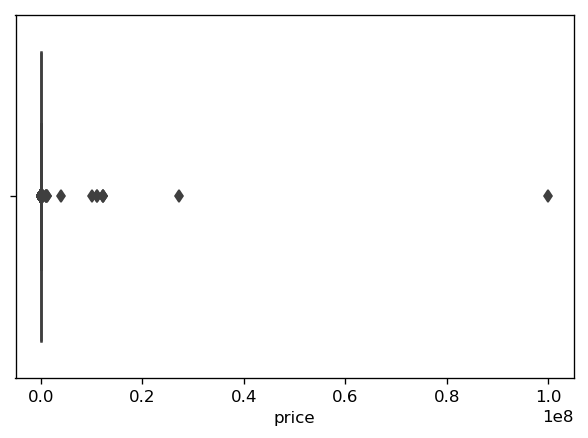

In [69]:
#we can see huge outliers in the data
import seaborn as sns
plt.figure(dpi=120)
ax = sns.boxplot(x=autos.price)
plt.show()

In [30]:
autos.sort_values(by='price')[imp].tail(20)

,price,odometer_km,brand,vehicle_type,gearbox,fuel_type,unrepaired_damage,model
47337,259000,20000,bmw,cabrio,manual,petrol,no,z_reihe
12682,265000,5000,porsche,coupe,automatic,petrol,no,911
35923,295000,5000,porsche,cabrio,automatic,petrol,no,911
34723,299000,100000,porsche,coupe,manual,petrol,no,911
14715,345000,20000,sonstige_autos,cabrio,automatic,petrol,no,NaN
36818,350000,5000,porsche,coupe,manual,petrol,no,911
37585,999990,150000,volkswagen,limousine,manual,petrol,yes,jetta
514,999999,125000,ford,kombi,manual,petrol,no,focus
43049,999999,150000,volkswagen,bus,manual,petrol,NaN,transporter
22947,1234566,150000,bmw,kombi,automatic,diesel,NaN,NaN


Looking at the data above, we see an abnormally high jump in price from `$`350000 to `$`999990. Moreover, the `$`999000 price is for a Volkswagon Jetta, which is highly unlikely. By comparing these prices with brand and models, we can conclude that these are incorrect values. Hence we can drop all data for prices above `$`350000.

#### Correcting data for outliers in prices

We saw from our previous analysis that prices below `$`200 and above `$`350000 will be considered outliers. We will create a new variable `cars` which contains cleaner data for analysis with the more important columns.

In [31]:
cars = autos.loc[autos.price.between(199,350001)][imp] # imp is a list of specfic column names that we created earlier

In [32]:
cars.head(10)

,price,odometer_km,brand,vehicle_type,gearbox,fuel_type,unrepaired_damage,model
0,5000,150000,peugeot,bus,manual,lpg,no,andere
1,8500,150000,bmw,limousine,automatic,petrol,no,7er
2,8990,70000,volkswagen,limousine,manual,petrol,no,golf
3,4350,70000,smart,kleinwagen,automatic,petrol,no,fortwo
4,1350,150000,ford,kombi,manual,petrol,no,focus
5,7900,150000,chrysler,bus,automatic,diesel,NaN,voyager
6,300,150000,volkswagen,limousine,manual,petrol,NaN,golf
7,1990,150000,volkswagen,limousine,manual,diesel,no,golf
8,250,150000,seat,NaN,manual,NaN,no,arosa
9,590,150000,renault,bus,manual,petrol,no,megane


#### Exploring prices across odometer values

In [33]:
autos.groupby('odometer_km').price.mean()

odometer_km
5000      11397.792141
10000     19404.571970
20000     17547.154337
30000     16343.263625
40000     48765.825397
50000     25596.660175
60000     12148.767182
70000     10753.006504
80000      9473.653900
90000      8259.381332
100000    12428.300138
125000     6197.897485
150000     8280.765945
Name: price, dtype: float64

We would expect the mean prices to decrease with the increase in distance traveled. However, we see unusual bumps in the data. This is because the data is not clean (we have used `autos` here, the original data that does not eliminate outliers). However, the same analysis on the clean dataset gives us a result that we would expect, as shown below.

In [34]:
x1 = cars.groupby('odometer_km').price.mean() # mean price for each odometer_km value

In [35]:
x2 = cars.groupby('odometer_km').price.median() # median price for each odometer_km value

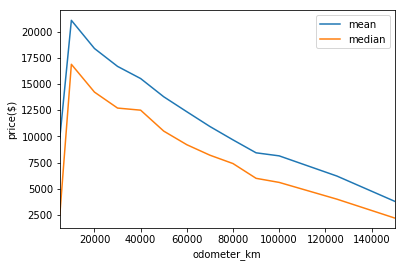

In [36]:
x1.plot.line()
x2.plot.line()
plt.legend(['mean','median'])
plt.ylabel('price($)')
plt.show() #plotting x1 and x2 to see the trend of avg price vs odometer readings.